In [1]:
import sys

from utils.gst_utils import gst_launch

## Human pose esetimation

In [2]:
# general
DEVICE="AUTO"

# paths
MODELS_PATH="/home/dlstreamer/models"
MODELS_PROC_PATH="/home/dlstreamer/dlstreamer_notebooks/model_proc"

# Models
MODEL_1="human-pose-estimation-0001"

# Model proc
HPE_MODEL_PROC=f"{MODELS_PROC_PATH}/{MODEL_1}.json"

# Model paths
HPE_MODEL=f"{MODELS_PATH}/intel/{MODEL_1}/FP32/{MODEL_1}.xml"

# Input
INPUT="https://github.com/intel-iot-devkit/sample-videos/raw/master/face-demographics-walking.mp4"

pipeline_str = (
    f'urisourcebin buffer-size=4096 uri={INPUT} ! '
    f'decodebin ! '
    f'gvaclassify model={HPE_MODEL} model-proc={HPE_MODEL_PROC} device={DEVICE} inference-region=full-frame ! queue ! '
    f'queue ! '
    f'gvawatermark ! videoconvert ! video/x-raw,format=BGR ! appsink'
)

ToggleButton(value=False, button_style='danger', description='Stop', icon='square', tooltip='Description')

[ WARN:0@4.854] global cap_gstreamer.cpp:1697 open OpenCV | GStreamer warning: unable to query duration of stream
[ WARN:0@4.854] global cap_gstreamer.cpp:1728 open OpenCV | GStreamer warning: Cannot query video position: status=1, value=3, duration=-1


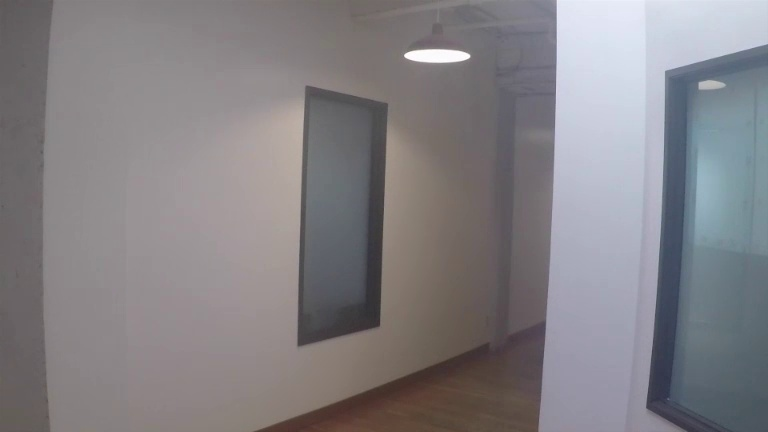

Error: Could not read frame.


In [3]:
ret = gst_launch(pipeline_str)

## Vehicle and pedestrian tracking

In [4]:
# general
DEVICE="AUTO"

# paths
MODELS_PATH="/home/dlstreamer/models"
MODELS_PROC_PATH="/home/dlstreamer/dlstreamer_notebooks/model_proc"

# Models
MODEL_1="person-vehicle-bike-detection-2004"
MODEL_2="person-attributes-recognition-crossroad-0230"
MODEL_3="vehicle-attributes-recognition-barrier-0039"

# Model proc
DETECTION_MODEL_PROC=f"{MODELS_PROC_PATH}/{MODEL_1}.json"
PERSON_CLASSIFICATION_MODEL_PROC=f"{MODELS_PROC_PATH}/{MODEL_2}.json"
VEHICLE_CLASSIFICATION_MODEL_PROC=f"{MODELS_PROC_PATH}/{MODEL_3}.json"

# Model paths
DETECTION_MODEL=f"{MODELS_PATH}/intel/{MODEL_1}/FP32/{MODEL_1}.xml"
PERSON_CLASSIFICATION_MODEL=f"{MODELS_PATH}/intel/{MODEL_2}/FP32/{MODEL_2}.xml"
VEHICLE_CLASSIFICATION_MODEL=f"{MODELS_PATH}/intel/{MODEL_3}/FP32/{MODEL_3}.xml"

# Tracker
TRACKING_TYPE="short-term-imageless" # Object tracking type, valid values: short-term-imageless, zero-term, zero-term-imageless

# Detector
DETECTION_INTERVAL=3

# Classifier
RECLASSIFY_INTERVAL=10 # Reclassify interval (run classification every 10th frame)

# Input
INPUT="https://github.com/intel-iot-devkit/sample-videos/raw/master/person-bicycle-car-detection.mp4"

pipeline_str = (
    f'urisourcebin buffer-size=4096 uri={INPUT} ! '
    f'decodebin ! '
    f'queue ! '
    f'gvadetect model={DETECTION_MODEL} model-proc={DETECTION_MODEL_PROC} inference-interval={DETECTION_INTERVAL} threshold=0.4 device={DEVICE} ! '
    f'queue ! '
    f'gvatrack tracking-type={TRACKING_TYPE} ! '
    f'queue ! '
    f'gvaclassify model={PERSON_CLASSIFICATION_MODEL} model-proc={PERSON_CLASSIFICATION_MODEL_PROC} reclassify-interval={RECLASSIFY_INTERVAL} device={DEVICE} object-class=person ! '
    f'queue ! '
    f'gvaclassify model={VEHICLE_CLASSIFICATION_MODEL} model-proc={VEHICLE_CLASSIFICATION_MODEL_PROC} reclassify-interval={RECLASSIFY_INTERVAL} device={DEVICE} object-class=vehicle ! '
    f'queue ! '
    f'gvawatermark ! videoconvert ! video/x-raw,format=BGR ! appsink'
)

ToggleButton(value=False, button_style='danger', description='Stop', icon='square', tooltip='Description')

[ WARN:1@77.428] global cap_gstreamer.cpp:1697 open OpenCV | GStreamer warning: unable to query duration of stream
[ WARN:1@77.428] global cap_gstreamer.cpp:1728 open OpenCV | GStreamer warning: Cannot query video position: status=1, value=57, duration=-1


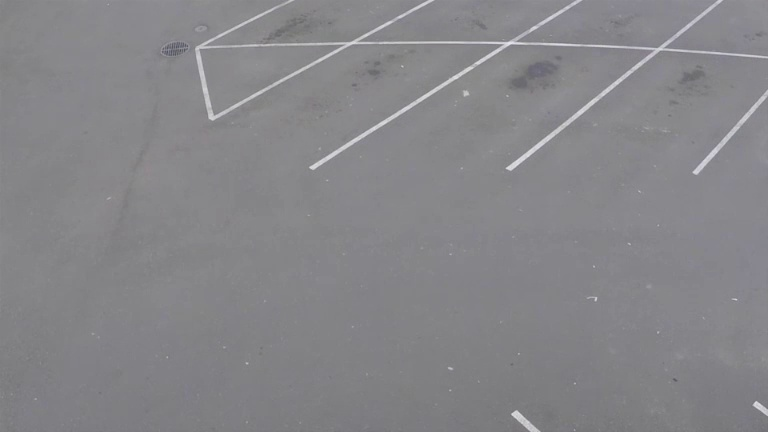

Error: Could not read frame.


In [5]:
ret = gst_launch(pipeline_str)

### Face detection and classification

In [6]:
# general
DEVICE="AUTO"

# paths
MODELS_PATH="/home/dlstreamer/models"
MODELS_PROC_PATH="/home/dlstreamer/dlstreamer_notebooks/model_proc"

# models
MODEL1="face-detection-adas-0001"
MODEL2="age-gender-recognition-retail-0013"
MODEL3="emotions-recognition-retail-0003"
MODEL4="landmarks-regression-retail-0009"

# model paths
DETECT_MODEL_PATH=f"{MODELS_PATH}/intel/face-detection-adas-0001/FP32/face-detection-adas-0001.xml"
CLASS_MODEL_PATH=f"{MODELS_PATH}/intel/age-gender-recognition-retail-0013/FP32/age-gender-recognition-retail-0013.xml"
CLASS_MODEL_PATH1=f"{MODELS_PATH}/intel/emotions-recognition-retail-0003/FP32/emotions-recognition-retail-0003.xml"
CLASS_MODEL_PATH2=f"{MODELS_PATH}/intel/landmarks-regression-retail-0009/FP32/landmarks-regression-retail-0009.xml"

# model proc paths
MODEL2_PROC=f"{MODELS_PROC_PATH}/{MODEL2}.json"
MODEL3_PROC=f"{MODELS_PROC_PATH}/{MODEL3}.json"
MODEL4_PROC=f"{MODELS_PROC_PATH}/{MODEL4}.json"

# Input
INPUT="https://github.com/intel-iot-devkit/sample-videos/raw/master/head-pose-face-detection-female-and-male.mp4"

pipeline_str = (
    f'urisourcebin buffer-size=4096 uri={INPUT} ! '
    f'decodebin ! '
    f'queue ! '
    f'gvadetect model={DETECT_MODEL_PATH} device={DEVICE} ! queue ! '
    f'gvaclassify model={CLASS_MODEL_PATH} model-proc={MODEL2_PROC} device={DEVICE} ! queue ! '
    f'gvaclassify model={CLASS_MODEL_PATH1} model-proc={MODEL3_PROC} device={DEVICE} ! queue ! '
    f'gvaclassify model={CLASS_MODEL_PATH2} model-proc={MODEL4_PROC} device={DEVICE} ! queue ! '
    f'queue ! '
    f'gvawatermark ! videoconvert ! video/x-raw,format=BGR ! appsink'
)

ToggleButton(value=False, button_style='danger', description='Stop', icon='square', tooltip='Description')

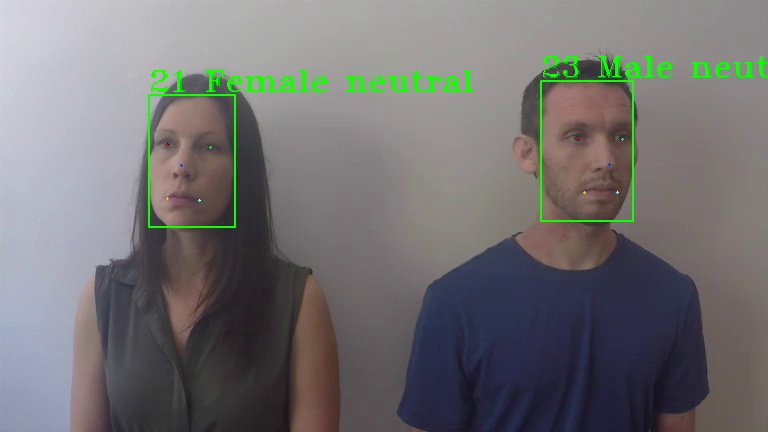

[ WARN:2@357.976] global cap_gstreamer.cpp:1697 open OpenCV | GStreamer warning: unable to query duration of stream
[ WARN:2@357.976] global cap_gstreamer.cpp:1728 open OpenCV | GStreamer warning: Cannot query video position: status=1, value=24, duration=-1


Error: Could not read frame.


In [7]:
ret = gst_launch(pipeline_str)